In [4]:
# Imports and loading of data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

deliveries = pd.read_csv("data/meal_deliveries.csv")
display(deliveries.head())

,id,week,center_id,city_code,region_code,center_type,op_area,meal_id,category,cuisine,checkout_price,base_price,emailer,featured,orders
0,1491015,6,67,638,56,B,7.0,2290,Rice Bowl,Indian,157.14,311.43,0,0,5075
1,1440194,40,92,526,34,C,2.9,2704,Other Snacks,Thai,291.03,291.03,0,0,41
2,1415786,2,81,526,34,A,4.0,1109,Rice Bowl,Indian,258.99,294.94,1,0,379
3,1074662,12,152,576,34,B,4.0,1109,Rice Bowl,Indian,268.69,268.69,0,0,690
4,1198250,116,10,590,56,B,6.3,1207,Beverages,Continental,354.05,493.76,0,0,135


### <br>1. What are the most popular food categories in each region?

['Rice Bowl' 'Other Snacks' 'Beverages' 'Biryani' 'Desert' 'Fish' 'Pizza'
 'Seafood' 'Sandwich' 'Pasta' 'Starters' 'Soup' 'Extras' 'Salad']


Total
region_code category        
23          Beverages    859
            Biryani       98
            Desert       193
            Extras       201
            Fish          79
...                      ...
93          Rice Bowl    214
            Salad        204
            Sandwich     202
            Seafood      195
            Starters     156

[104 rows x 1 columns]

<Figure size 640x480 with 0 Axes>

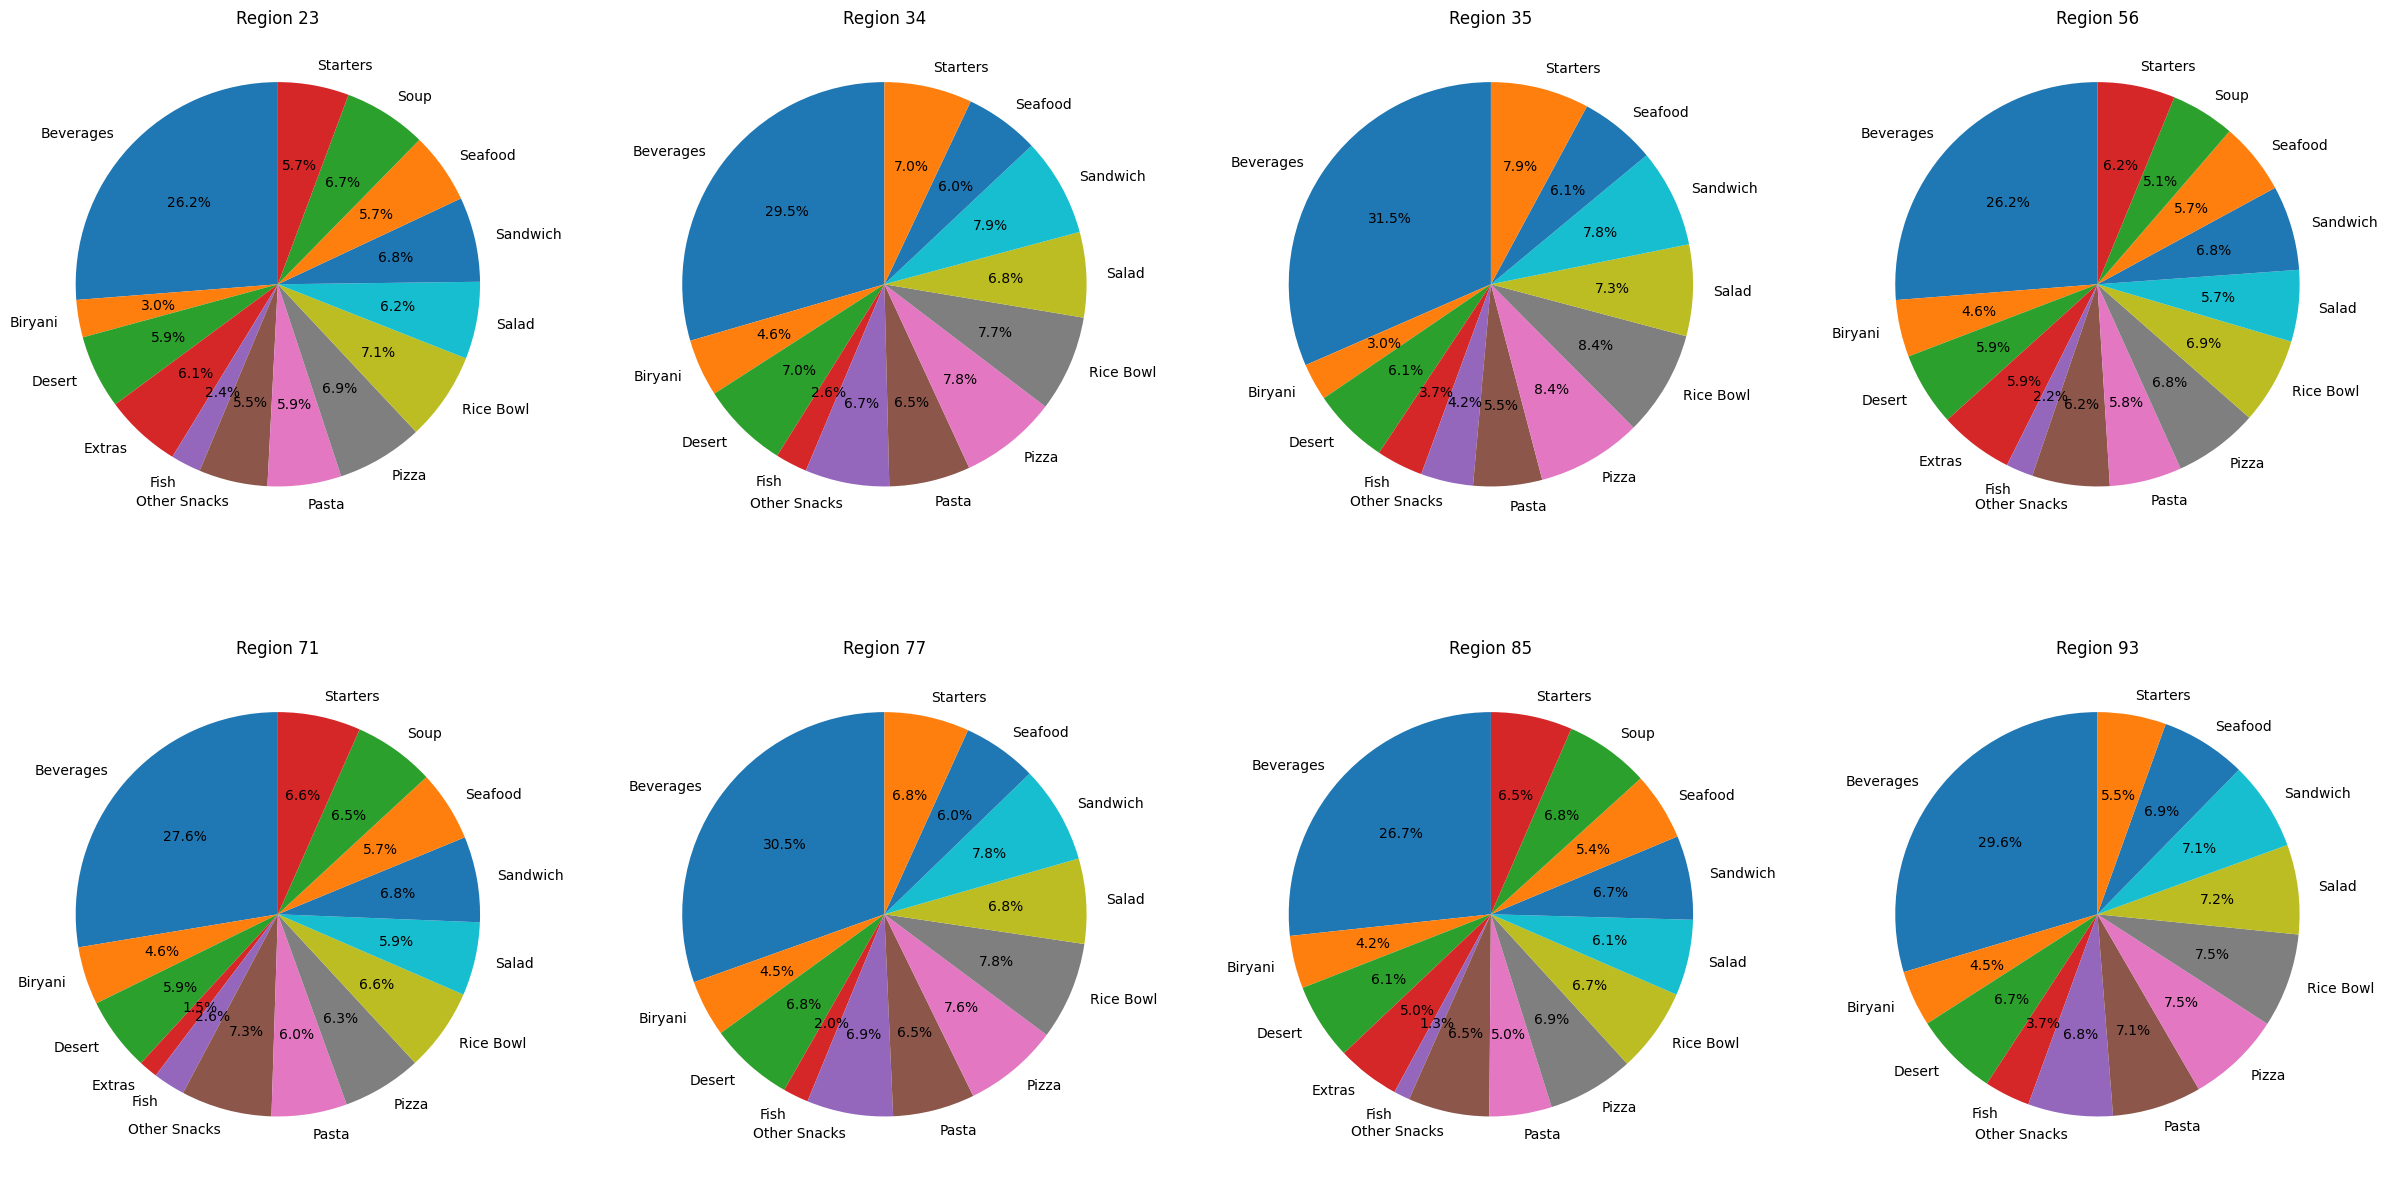

,region_code,category
0,23,Beverages
1,34,Beverages
2,35,Beverages
3,56,Beverages
4,71,Beverages
5,77,Beverages
6,85,Beverages
7,93,Beverages


In [29]:
_ = plt.clf()

"""Let's get a sense of the data"""
# Print all the unique values for 'category'
print(deliveries["category"].unique())

# Aggregate the count of categories and group by region and category.
foods = deliveries.groupby(["region_code", "category"]).agg(count=("category", "count"))
foods.rename(columns={"count": "Total"}, inplace=True)
display(foods)


"""Finding the answer by displaying the data on pie charts (one for each region)"""
# Get unique values in the first index
groups = foods.index.get_level_values("region_code").unique()

# Create 2 figures and 4 subplots each
fig, axes = plt.subplots(2, len(groups)//2, figsize=(30, 15))

# Iterate over groups and create pie charts in subplots
for i, group in enumerate(groups):
    group_data = foods.loc[group]

    # Extract values and labels from the DataFrame
    values = group_data["Total"]
    labels = values.index

    # Plot the pie charts
    autopct="%1.1f%%"
    # autopct= lambda x: '{:.0f}'.format(x*values.sum()/100)      # Uncomment this line to view raw values instead of percentages
    axes[i//4,i%4].pie(values, labels=labels, autopct=autopct, startangle=90)
    axes[i//4,i%4].set_title(f"Region {group}")

plt.show()



"""Finding the answer through aggregate :"""
# Aggregate by region and display the most popular category
top_foods = (
    deliveries.groupby("region_code")["category"]
    .agg(lambda x: x.value_counts().idxmax())
    .reset_index()
)
display(top_foods)

The top food category across all regions is 'Beverages'.

### <br>2. For each of the two cities with more than three fulfillment centers, would you recommend:
1. Keeping the number of centers the same
2. Combine fulfillment centers
3. Opening new centers

In [34]:
more_than_three = deliveries.groupby("city_code").agg({"center_id": "unique"})
print(more_than_three[more_than_three["center_id"].str.len() > 3])

                                         center_id
city_code                                         
526             [92, 81, 162, 88, 29, 39, 32, 146]
590        [10, 124, 43, 137, 13, 153, 91, 53, 41]


We see that city_code 526 and 590 have >3 fulfillement centers, let's look at the average order per center.

,orders
center_id,
29,199.843008
32,209.058824
39,225.401998
81,195.889602
88,183.098971
92,188.085884
146,304.297955
162,153.391624


,orders
center_id,
10,485.935392
13,607.356519
41,120.395269
43,559.235865
53,179.590840
91,121.168973
124,250.391756
137,442.451818
153,230.284160


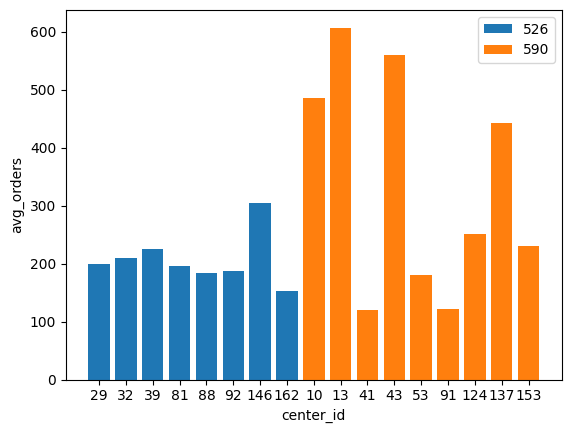

In [35]:
"""Let's compare the average of orders for each center in city 526 and 590"""
_ = plt.clf()


# 526
city_526 = deliveries[deliveries["city_code"] == 526]
distribution526 = city_526.groupby("center_id").agg({"orders": "mean"})
_ = plt.bar(
    distribution526.index.values.astype(str), distribution526["orders"], label="526"
)
_ = plt.xlabel("center_id")
_ = plt.ylabel("avg_orders")

# 590
city_590 = deliveries[deliveries["city_code"] == 590]
distribution590 = city_590.groupby("center_id").agg({"orders": "mean"})
_ = plt.bar(
    distribution590.index.values.astype(str), distribution590["orders"], label="590"
)
_ = plt.xlabel("center_id")
_ = plt.ylabel("avg_orders")
_ = plt.legend()

display(distribution526)
display(distribution590)

plt.show()

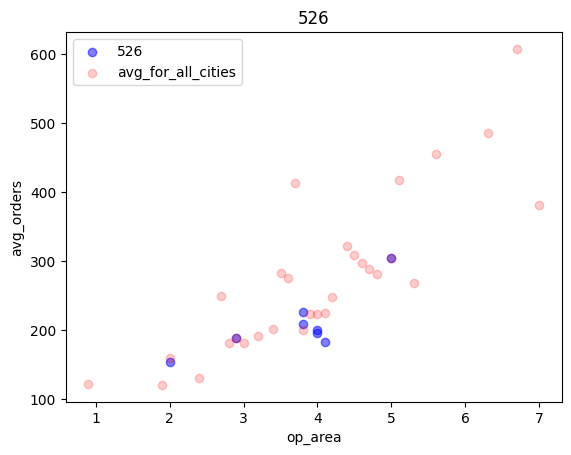

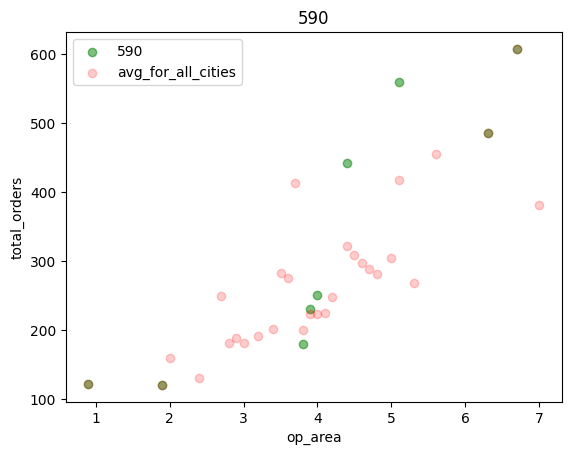

In [36]:
""" Now let's compare the service area of those fulfillement centers and their average count of orders """
_ = plt.clf()


# 526
_ = plt.figure(1)
distribution526 = city_526.groupby("center_id").agg(
    {"orders": "mean", "center_type": "max", "op_area": "mean"}
)
x526 = distribution526.index.values.astype(str)
y526 = distribution526["orders"]
z526 = distribution526["op_area"]
_ = plt.scatter(z526, y526, color="blue", label="526", alpha=0.5)
_ = plt.xlabel("op_area")
_ = plt.ylabel("avg_orders")
_ = plt.title("526")

oparea_means = deliveries.groupby("op_area").agg({"orders": "mean"})
_ = plt.scatter(
    oparea_means.index.values,
    oparea_means["orders"],
    color="red",
    label="avg_for_all_cities",
    alpha=0.2,
)
_ = plt.legend()


# 590
_ = plt.figure(2)
distribution590 = city_590.groupby("center_id").agg(
    {"orders": "mean", "center_type": "max", "op_area": "mean"}
)
x590 = distribution590.index.values.astype(str)
y590 = distribution590["orders"]
z590 = distribution590["op_area"]
_ = plt.scatter(z590, y590, color="green", label="590", alpha=0.5)
_ = plt.xlabel("op_area")
_ = plt.ylabel("total_orders")
_ = plt.title("590")
_ = plt.scatter(
    oparea_means.index.values,
    oparea_means["orders"],
    color="red",
    label="avg_for_all_cities",
    alpha=0.2,
)

_ = plt.legend()
plt.show()

Now we see that :<br>
-for city 526, the size of the fulfillement center VS the average of orders  seems very similar to the mean of that same graph for other cities.<br>
-for city 590, we see that the amount of orders for size 4 to 6 is larger than the average. In that case, it might be a good idea to either increase the size of those fulfillement center or add additional ones in those locations.

In [37]:
""" Let's see what the min/max values are for each center type and their corresponding center_id """


def concat_values(x):
    unique_x = set(str(val) for val in x if pd.notna(val) and val != "")
    return ",".join(unique_x)


center_range_590 = city_590.groupby("center_type").agg(
    {"op_area": ["min", "max"], "center_id": concat_values}
)
display(center_range_590)


df2 = city_590[["center_type", "op_area", "center_id"]]
df3 = df2[(4.0 < df2["op_area"]) & (df2["op_area"] < 6.0)]

df4 = df3[["center_type", "op_area", "center_id"]].drop_duplicates(subset="center_id")
display(df4)

op_area           center_id
                min  max  concat_values
center_type                            
A               3.8  5.1  43,137,153,53
B               6.3  6.7          10,13
C               0.9  4.0      124,91,41

,center_type,op_area,center_id
41,A,5.1,43
60,A,4.4,137


We see that for city 590, the two centers with area size between 4 and 6 are of type A. Therefore, a possible solution would be to increase those centers to type B or add an additional fulfillment center in that city.

### <br>3. Investigate the effectiveness of email campaigns and promoting meals on the website.

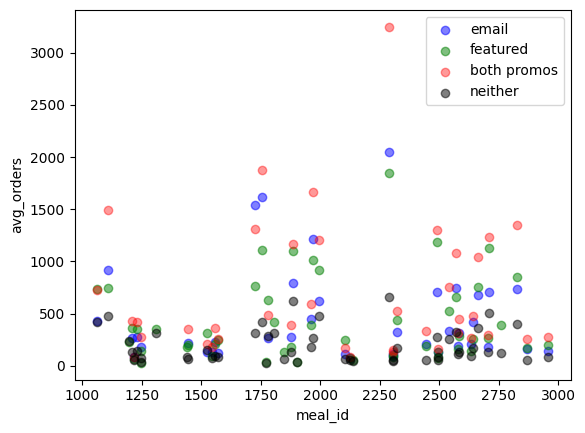

In [38]:
_ = plt.clf()


email_promo = deliveries[(deliveries["emailer"] == 1) & (deliveries["featured"] == 0)]
# print(email_promo)
email_meals = email_promo.groupby("meal_id").agg({"orders": "mean"})
# print(email_meals)

featured_promo = deliveries[
    (deliveries["emailer"] == 0) & (deliveries["featured"] == 1)
]
# print(featured_promo)
featured_meals = featured_promo.groupby("meal_id").agg({"orders": "mean"})

both_promo = deliveries[(deliveries["emailer"] == 1) & (deliveries["featured"] == 1)]
# print(both_promo)
both_meals = both_promo.groupby("meal_id").agg({"orders": "mean"})

neither = deliveries[(deliveries["emailer"] == 0) & (deliveries["featured"] == 0)]
# print(neither)
no_promo_meals = neither.groupby("meal_id").agg({"orders": "mean"})


_ = plt.scatter(
    email_meals.index.values,
    email_meals["orders"],
    color="blue",
    label="email",
    alpha=0.5,
)
_ = plt.scatter(
    featured_meals.index.values,
    featured_meals["orders"],
    color="green",
    label="featured",
    alpha=0.5,
)
_ = plt.scatter(
    both_meals.index.values,
    both_meals["orders"],
    color="red",
    label="both promos",
    alpha=0.4,
)
_ = plt.scatter(
    no_promo_meals.index.values,
    no_promo_meals["orders"],
    color="black",
    label="neither",
    alpha=0.5,
)
_ = plt.xlabel("meal_id")
_ = plt.ylabel("avg_orders")
_ = plt.legend()
_ = plt.show()

Throughout all cities and for almost all meals, we see that the average number of orders is higher when the meal is featured on either email and website, and even higher when it's both.

### <br>4. Explore ways of forecasting food order numbers to assist purchasing managers in their planning.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt


pd.set_option("display.max_columns", None)
deliveries = pd.read_csv("data/meal_deliveries.csv")
# display(deliveries.head())
# print(deliveries.columns)
# print(deliveries.dtypes)


""" Perform one-hot encoding on 'category' and 'cuisine' """
dummies = pd.get_dummies(
    deliveries,
    columns=["category", "cuisine"],
    prefix=["dummy", "dummy"],
    drop_first=True,
)
# print(dummies.columns)


""" Specify X and y """
X = dummies.drop(
    [
        "id",
        "week",
        "center_id",
        "city_code",
        "region_code",
        "center_type",
        "meal_id",
        "base_price",
        "orders",
    ],
    axis=1,
)  # We can define X by taking the previous dummy dataframe and excluding the y column as well as the features we don't want.
# print(X.columns)
y = deliveries["orders"]
# print(y)


"""Separate the training and testing(validating) data"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# the parameter 'test_size=' is optional and its default value is 0.25
# the paramter 'random_state=' is optional and will be random everytime the code is run


""" Make the model and let it calculate the y prediction"""
model = LinearRegression()
model.fit(X_train, y_train)
result = model.predict(X_test)
""" Compare the prediction and the original side by side"""
df_compare = pd.DataFrame({"Actual": y_test, "Predicted": result})
display(df_compare)


""" Calculate the errors """
mse = mean_squared_error(y_test, result)
r2 = r2_score(y_test, result)
mae = mean_absolute_error(y_test, result)
rmse = sqrt(mse)
print("\nThe Mean Squared Error is", mse)
print("The R2 is", r2)
print("The Mean Absolute Error is", mae)
print("The Root Mean Squared Error is", rmse)

,Actual,Predicted
38399,312,307.214604
196140,82,-2.081384
169074,391,548.773574
222190,55,184.432355
110584,473,586.285272
...,...,...
66467,1701,756.928411
24010,243,197.283565
78277,136,229.728129
154231,53,65.764056



The Mean Squared Error is 99749.14672518134
The R2 is 0.3960500529724057
The Mean Absolute Error is 162.225271338663
The Root Mean Squared Error is 315.8308831086367


In [40]:
# Comparing to baseline model

from sklearn.dummy import DummyRegressor

baseline_model = DummyRegressor(strategy="mean")
baseline_model.fit(X_train, y_train)
baseline_preds = baseline_model.predict(X_test)


# Compare mean squared error
baseline_mse = mean_squared_error(y_test, baseline_preds)

print(f"Baseline MSE: {baseline_mse}")
print(f"My Model MSE: {mse}")

Baseline MSE: 155490.39024472455
My Model MSE: 90591.88064541545


<br><br>Let's try this again with an Alteryx workflow.

<img src="data/Alteryx_screenshot.jpg" width="1600" style="display:inline-block;">



We get the following results:

<img src="data/stats1.jpg" width="500" style="display:inline-block; margin-right: 20px;">
<img src="data/stats2.jpg" width="500" style="display:inline-block; margin-right: 20px;">
<img src="data/stats3.jpg" width="500" style="display:inline-block;">


The error values are very similar to those we obtained with the Python scikit library.<br>
Alteryx Insights does seem to indicate that the city, region and price have weak linear correlation with the amount of orders.<br>
Let's verify this with the Pearson correlation coefficient.

In [31]:
""" Using Numpy, we calculate the correlation Matrix between 'city_code' and 'orders'. Repeat for 'region_code', 'base_price' and 'checkout_price' """

print("\nPearson Correlation Coefficients:")
print(
    "region/orders: ",
    np.corrcoef(deliveries["region_code"], deliveries["orders"])[0, 1],
)
print("city/orders: ", np.corrcoef(deliveries["city_code"], deliveries["orders"])[0, 1])
print(
    "price/orders: ", np.corrcoef(deliveries["base_price"], deliveries["orders"])[0, 1]
)

"""for discounts, only select the rows where the 'checkout_price' is lower than the 'base_price' """
discounts = deliveries[deliveries["checkout_price"] < deliveries["base_price"]]
print(
    "discounts/orders: ",
    np.corrcoef(discounts["checkout_price"], discounts["orders"])[0, 1],
)


Pearson Correlation Coefficients:
region/orders:  0.02899204568755571
city/orders:  0.040286078335729995
price/orders:  -0.22242038217010865
discounts/orders:  -0.2458497837788045


<br>It seems that indeed the location matters not when it comes to order amount.<br> 
However, the price seems negatively correlated as we would expect. (higher prices mean less orders)